In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [84]:
url = url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
print("Columns:")
print(df.columns.tolist())

Columns:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [87]:
print('Missing value:')
print(df.isnull().sum())
print("\n percentage missing:")
print((df.isnull().sum() / len(df) * 100). round(1))

Missing value:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 percentage missing:
PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
dtype: float64


In [88]:
#fill age
df['Age'] = df['Age'].fillna(df['Age'].median())

#fill embarked
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print('Missing after filling:')
print(df[['Age','Embarked']].isnull().sum())


Missing after filling:
Age         0
Embarked    0
dtype: int64


In [89]:
print('sex values:',df['Sex'].unique())
print('Embarked values:',df['Embarked'].unique())

sex values: ['male' 'female']
Embarked values: ['S' 'C' 'Q']


In [90]:
# map
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
print('Sex after encoding:')
print(df['Sex'].value_counts())

Sex after encoding:
Sex
0    577
1    314
Name: count, dtype: int64


In [91]:
embarked_dummies = pd.get_dummies(df, columns=['Embarked'],prefix='Embarked')
print('Embarked one-hot encoded:')
embarked_dummies.head()

Embarked one-hot encoded:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,False,False,True


In [92]:
df = pd.concat([df, embarked_dummies], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,1,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,1,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,35.0,0,0,373450,8.0500,NaN,False,False,True


In [93]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S']
X = df[features]
y = df['Survived']

print("features:",features)
print("\nX shape ", X.shape)
X.head()

features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

X shape  (891, 15)


,Pclass,Pclass,Sex,Sex,Age,Age,SibSp,SibSp,Parch,Parch,Fare,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,3,0,0,22.0,22.0,1,1,0,0,7.2500,7.2500,False,False,True
1,1,1,1,1,38.0,38.0,1,1,0,0,71.2833,71.2833,True,False,False
2,3,3,1,1,26.0,26.0,0,0,0,0,7.9250,7.9250,False,False,True
3,1,1,1,1,35.0,35.0,1,1,0,0,53.1000,53.1000,False,False,True
4,3,3,0,0,35.0,35.0,0,0,0,0,8.0500,8.0500,False,False,True


In [94]:
print('any things left')

print(X.isnull().sum().sum())

print("\n data types:")

print(X.dtypes)

any things left
0

 data types:
Pclass          int64
Pclass          int64
Sex             int64
Sex             int64
Age           float64
Age           float64
SibSp           int64
SibSp           int64
Parch           int64
Parch           int64
Fare          float64
Fare          float64
Embarked_C       bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training:{len(X_train)}")
print(f"Testing:{len(y_test)}")

Training:712
Testing:179


In [96]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train,y_train)
train_acc = model.score(X_train,y_train)
test_acc = model.score(X_test,y_test)
print(f"Training accuracy:{train_acc:.2%}")
print(f"Testing accuracy:{test_acc:.2%}")


Training accuracy:85.96%
Testing accuracy:81.01%


In [97]:
importance = pd.DataFrame({
    "features":X_train.columns,
    "importance":model.feature_importances_
}).sort_values('importance', ascending=False)
print("Features importance")
print(importance)

Features importance
      features  importance
3          Sex    0.244004
2          Sex    0.242262
10        Fare    0.081811
11        Fare    0.078722
1       Pclass    0.076479
4          Age    0.061885
0       Pclass    0.057627
5          Age    0.055059
7        SibSp    0.026230
6        SibSp    0.019577
9        Parch    0.016264
12  Embarked_C    0.013882
8        Parch    0.013314
14  Embarked_S    0.009125
13  Embarked_Q    0.003761


In [98]:
#visualize
#predict passenger

Vazifa



In [99]:
#visualize
#ayolnikini tekshirish
#what id that women
# va nega training accuracy va test accuracyni qanday baland qilsa boladi
#predict passenger


In [100]:
print(model.n_features_in_)
print(X_train.columns)


new_passenger_df = pd.DataFrame([{
    "Pclass": 3,
    "Sex": 0,
    "Age": 25,
    "SibSp": 0,
    "Parch": 0,
    "Fare": 15,
    "Embarked_C": 0,
    "Embarked_Q": 0,
    "Embarked_S": 1
}])

prediction = model.predict(new_passenger_df[X_train.columns])[0]
print(prediction)


15
Index(['Pclass', 'Pclass', 'Sex', 'Sex', 'Age', 'Age', 'SibSp', 'SibSp',
       'Parch', 'Parch', 'Fare', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')
[0 0]


In [126]:
new_passenger_df["Sex"] = 1
prediction = model.predict(new_passenger_df[X_train.columns])[0]
print(prediction)


[1 1]


In [129]:
new_passenger_df["Sex"] = 0
prediction = model.predict(new_passenger_df[X_train.columns])[0]
print("Male prediction:", prediction)

new_passenger_df["Sex"] = 1
prediction = model.predict(new_passenger_df[X_train.columns])[0]
print("Female prediction:", prediction)


Male prediction: [0 0]
Female prediction: [1 1]


In [102]:
# Duplicate ustunlarni olib tashlash
df = df.loc[:, ~df.columns.duplicated()]

# Tekshiramiz
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


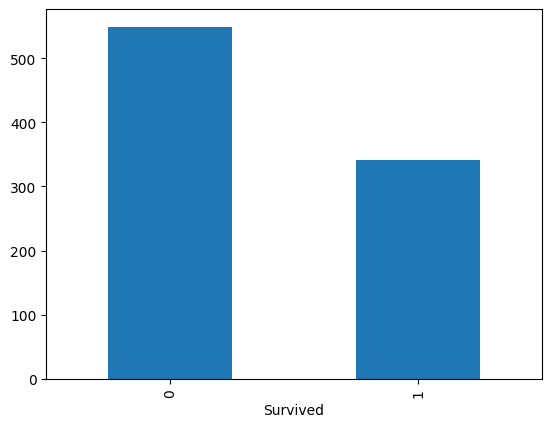

In [103]:
df["Survived"].value_counts().plot(kind="bar")
plt.show()

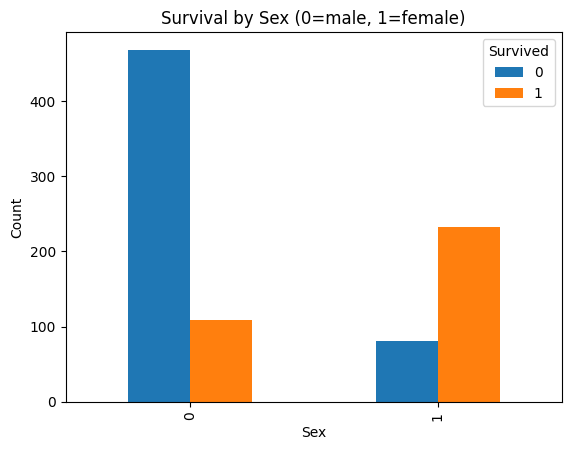

In [104]:
df.groupby(["Sex","Survived"]).size().unstack(fill_value=0).plot(kind="bar")#sex boyicha survival
plt.title("Survival by Sex (0=male, 1=female)")
plt.ylabel("Count")
plt.show()


In [105]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})


In [106]:
women = df[df["Sex"] == 1]


In [107]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df_clean = pd.read_csv(url)

# Sex ustunini qayta tiklash
df["Sex"] = df_clean["Sex"].map({"male": 0, "female": 1})


In [108]:
print(df["Sex"].unique())
print(df["Sex"].value_counts())


[0 1]
Sex
0    577
1    314
Name: count, dtype: int64


In [109]:
women = df[df["Sex"] == 1]
print("Women rows:", len(women))


Women rows: 314


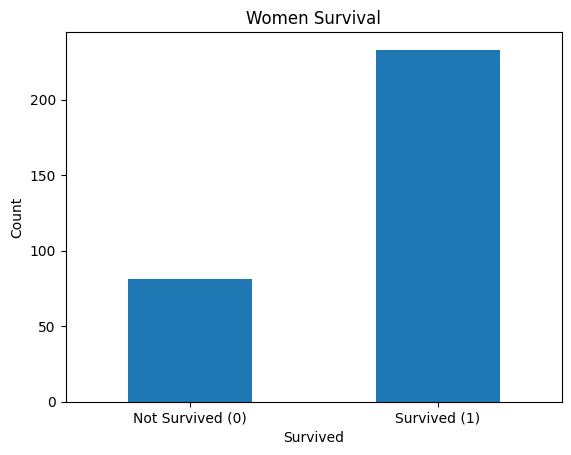

In [ ]:


women = df[df["Sex"] == 1]
counts = women["Survived"].value_counts().reindex([0,1], fill_value=0)

counts.plot(kind="bar")
plt.title("Women Survival")
plt.xticks([0,1], ["Not Survived (0)", "Survived (1)"], rotation=0)
plt.ylabel("Count")
plt.show()


In [112]:
women_rate = women["Survived"].mean() * 100
print("Women survival rate:", round(women_rate, 2), "%")


Women survival rate: 74.2 %


In [120]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)


In [113]:
y_true = np.array(y_test).ravel()
y_hat  = np.array(y_pred).ravel()

cm = confusion_matrix(y_true, y_hat)
print(cm)

[[186  24]
 [ 44 104]]


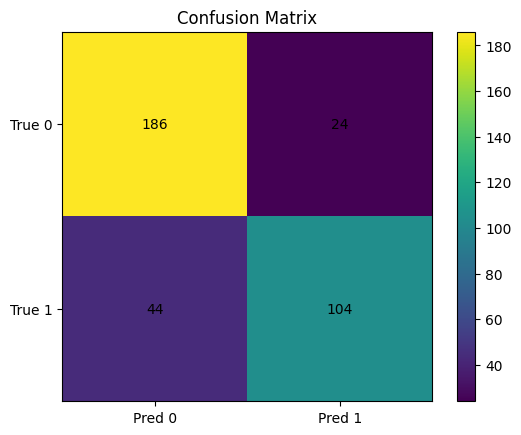

In [114]:
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ["Pred 0","Pred 1"])
plt.yticks([0,1], ["True 0","True 1"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


In [115]:
y = df["Survived"].astype(int)


In [116]:
y = df['Survived']


In [ ]:

print(cm)


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets